# Introduction to Pandas for Marketing

What does a DS on Marketing team can do?
- Analyzing Marketing campaign performance
- Attribute credit for conversions to mkt channels
- A/B Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marketing = pd.read_csv('./datasets/marketing.csv')

Let's explore our data.

**First let's print the first five rows**

In [2]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

**Now, we print a summary of the daatset**

In [3]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

**For last, we print the non.missing values and data type of all columns**

In [4]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


**We are going to convert the data to the correct data types**

In [5]:
print(marketing['is_retained'].dtype)

object


In [6]:
marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing['is_retained'].dtype)

bool


**Let's add a new column called *channel_code* which maps the values in the *subscribing_channel* column to a numeric scale using *channel_dict***

In [7]:
channel_dict = {"House Ads": 1,
                "Instagram": 2,
               "Facebook": 3,
               "Email": 4,
               "Push": 5}

In [8]:
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

**Add a new column, *is_correct_lang*, which is *'Yes'* if the user was shown the ad in their preferred language, *'No'* otherwise.**

In [9]:
marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [10]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel  is_retained  channel_code is_correct_lang  
0           NaN           House Ads      

**Currently the date columns are treated as Objects, let's change them to date type**

In [11]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

In [12]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  channel_code         1856 non-null   float64       
 13  is_correct_lang      10037 non-

**Let's get the day of the week for every date type column**

In [13]:
marketing['date_served_dow'] = marketing['date_served'].dt.dayofweek
marketing['date_subscribed_dow'] = marketing['date_subscribed'].dt.dayofweek
marketing['date_canceled_dow'] = marketing['date_canceled'].dt.dayofweek

In [14]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  channel_code  \
0           NaT           House Ads         True        

## Some Exploratory Analysis of the Dataset

**Let's explore how many users are seeing the marketing assests each day**

In [15]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


**It would look better in a plot. Let's plot it**

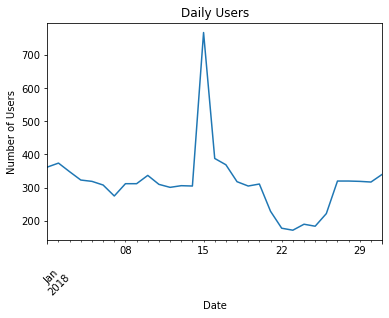

In [17]:
daily_users.plot()

plt.title('Daily Users')
plt.ylabel('Number of Users')
plt.xlabel('Date')

plt.xticks(rotation = 45)

plt.show()